In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def calculate_kinf(enrichment):
    sigma = {
        'f_pu239': 1.9,
        'c_pu239': 0.6,
        'f_u238': 0.01,
        'c_u238': 0.3
    }

    fraction_pu239 = enrichment / 100
    fraction_u238 = 1 - fraction_pu239

    nu = 2.9

    sigma_f = fraction_pu239 * sigma['f_pu239'] + fraction_u238 * sigma['f_u238']
    sigma_a = fraction_pu239 * (sigma['f_pu239'] + sigma['c_pu239']) + fraction_u238 * (sigma['f_u238'] + sigma['c_u238'])

    kinf = nu * (sigma_f / sigma_a)

    return kinf


In [42]:
enrichment = np.linspace(8, 10, 100)

kinf_values = calculate_kinf(enrichment)


In [43]:
price_usd_per_pound = {
    8: 210,
    9: 240,
    10: 280
}

# interpolate prices for the enrichment values
price_per_pound = np.interp(enrichment, list(price_usd_per_pound.keys()), list(price_usd_per_pound.values()))   

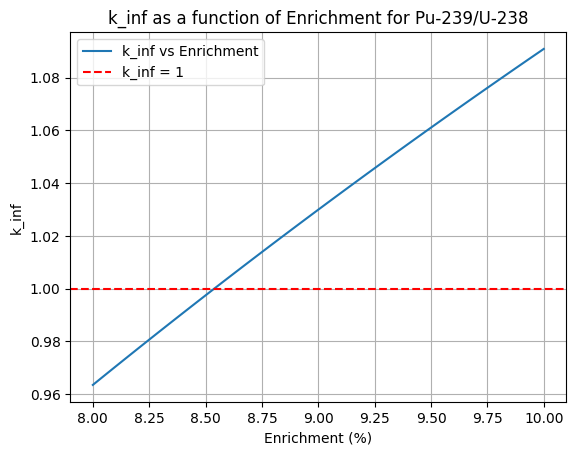

In [44]:
plt.plot(enrichment, kinf_values, label='k_inf vs Enrichment')
plt.xlabel('Enrichment (%)')
plt.ylabel('k_inf')
plt.title('k_inf as a function of Enrichment for Pu-239/U-238')
plt.axhline(y=1, color='r', linestyle='--', label='k_inf = 1')
plt.legend()
plt.grid()
plt.show()

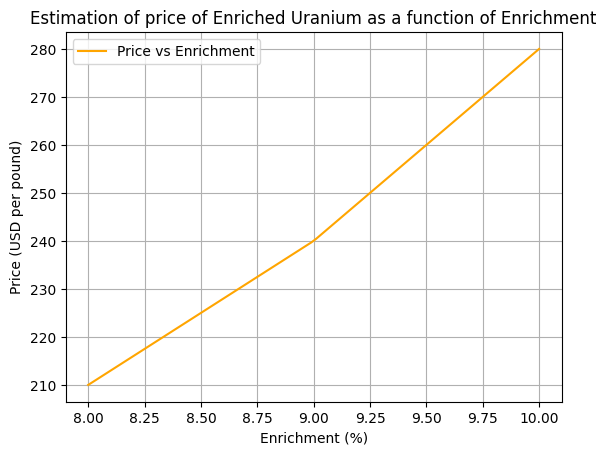

In [45]:
# Plotting the price per pound against enrichment
plt.figure()
plt.plot(enrichment, price_per_pound, label='Price vs Enrichment', color='orange')
plt.xlabel('Enrichment (%)')
plt.ylabel('Price (USD per pound)')
plt.title('Estimation of price of Enriched Uranium as a function of Enrichment')
plt.grid()
plt.legend()
plt.show()